In [80]:
import pandas as pd 
import numpy as np 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
from dateutil.parser import parse
def parseDateTime(data):
  new_data = parse(data.replace("T"," ").split(".")[0])
  #new_data = data.replace("T"," ").split(".")[0]
  return new_data

In [74]:
raw_logs = pd.read_csv("/Users/dinesh.ladi/Downloads/weblog_raw_logs.csv")
#master_logs.columns = ['IP_ADDRESS','Session_Group','Start_Time','End_Time','Get_Count','Post_Count','URL_Count','Unique_URL_Count','Session_Time','URL']
raw_logs.head(10)

,IP_ADDRESS,TIME_STAMP,REQUEST_TYPE,URL
0,123.242.248.130,2015-07-22T09:00:28.000Z,GET,https://paytm.com:443/shop/authresponse
1,203.91.211.44,2015-07-22T09:00:27.000Z,GET,https://paytm.com:443/shop/wallet/txnhistory
2,1.39.32.179,2015-07-22T09:00:27.000Z,GET,https://paytm.com:443/shop/wallet/txnhistory
3,180.179.213.94,2015-07-22T09:00:28.000Z,GET,https://paytm.com:443/shop/p/micromax-yu-yurek...
4,120.59.192.208,2015-07-22T09:00:28.000Z,POST,https://paytm.com:443/papi/v1/expresscart/verify
5,117.239.195.66,2015-07-22T09:00:28.000Z,GET,https://paytm.com:443/api/user/favourite
6,101.60.186.26,2015-07-22T09:00:28.000Z,GET,https://paytm.com:443/favicon.ico
7,59.183.41.47,2015-07-22T09:00:28.000Z,GET,https://paytm.com:443/papi/rr/products/6937770...
8,117.239.195.66,2015-07-22T09:00:28.000Z,GET,https://paytm.com:443/images/greyStar.png
9,183.83.237.83,2015-07-22T09:00:28.000Z,GET,https://paytm.com:443/shop/cart


In [78]:
raw_logs["TIME_STAMP"] = raw_logs["TIME_STAMP"].apply(lambda x: parseDateTime(x))
raw_logs.count()
raw_logs.head(10)

,IP_ADDRESS,TIME_STAMP,REQUEST_TYPE,URL
0,123.242.248.130,2015-07-22 09:00:28,GET,https://paytm.com:443/shop/authresponse
1,203.91.211.44,2015-07-22 09:00:27,GET,https://paytm.com:443/shop/wallet/txnhistory
2,1.39.32.179,2015-07-22 09:00:27,GET,https://paytm.com:443/shop/wallet/txnhistory
3,180.179.213.94,2015-07-22 09:00:28,GET,https://paytm.com:443/shop/p/micromax-yu-yurek...
4,120.59.192.208,2015-07-22 09:00:28,POST,https://paytm.com:443/papi/v1/expresscart/verify
5,117.239.195.66,2015-07-22 09:00:28,GET,https://paytm.com:443/api/user/favourite
6,101.60.186.26,2015-07-22 09:00:28,GET,https://paytm.com:443/favicon.ico
7,59.183.41.47,2015-07-22 09:00:28,GET,https://paytm.com:443/papi/rr/products/6937770...
8,117.239.195.66,2015-07-22 09:00:28,GET,https://paytm.com:443/images/greyStar.png
9,183.83.237.83,2015-07-22 09:00:28,GET,https://paytm.com:443/shop/cart


In [79]:
ts_df = raw_logs[["TIME_STAMP","URL"]].set_index('TIME_STAMP').resample('1min').count()
ts_df = ts_df["URL"]/60   ### requests per second 
ts_df.head(10)

TIME_STAMP
2015-07-22 02:40:00     78.016667
2015-07-22 02:41:00    113.116667
2015-07-22 02:42:00     93.100000
2015-07-22 02:43:00     78.900000
2015-07-22 02:44:00     78.000000
2015-07-22 02:45:00      5.383333
2015-07-22 02:46:00      0.000000
2015-07-22 02:47:00      0.000000
2015-07-22 02:48:00      0.000000
2015-07-22 02:49:00      0.000000
Freq: T, Name: URL, dtype: float64

Text(0,0.5,'Load')

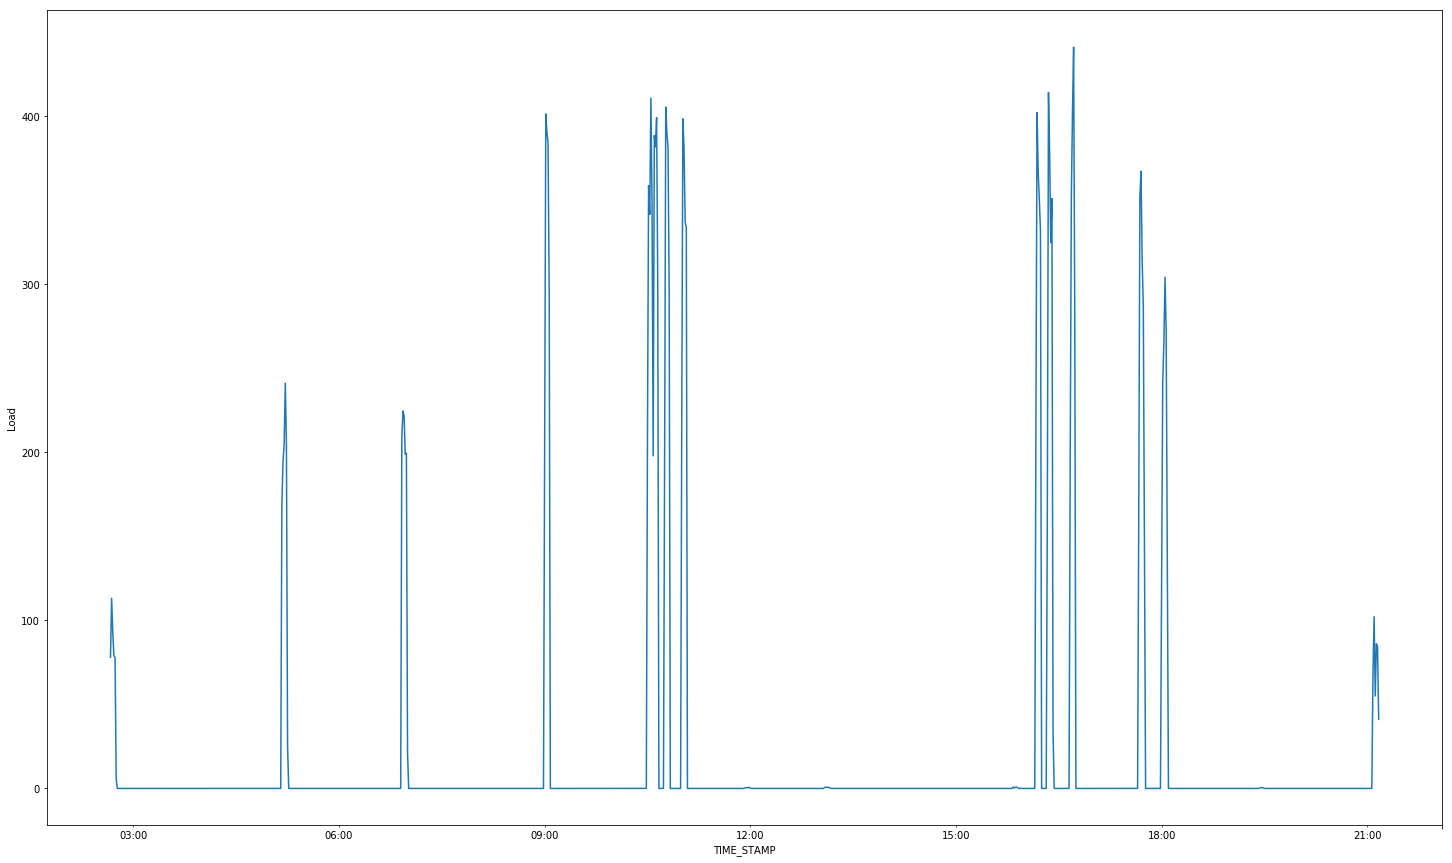

In [32]:
ax = ts_df.plot(figsize=(25,15))
ax.set_ylabel("Load")

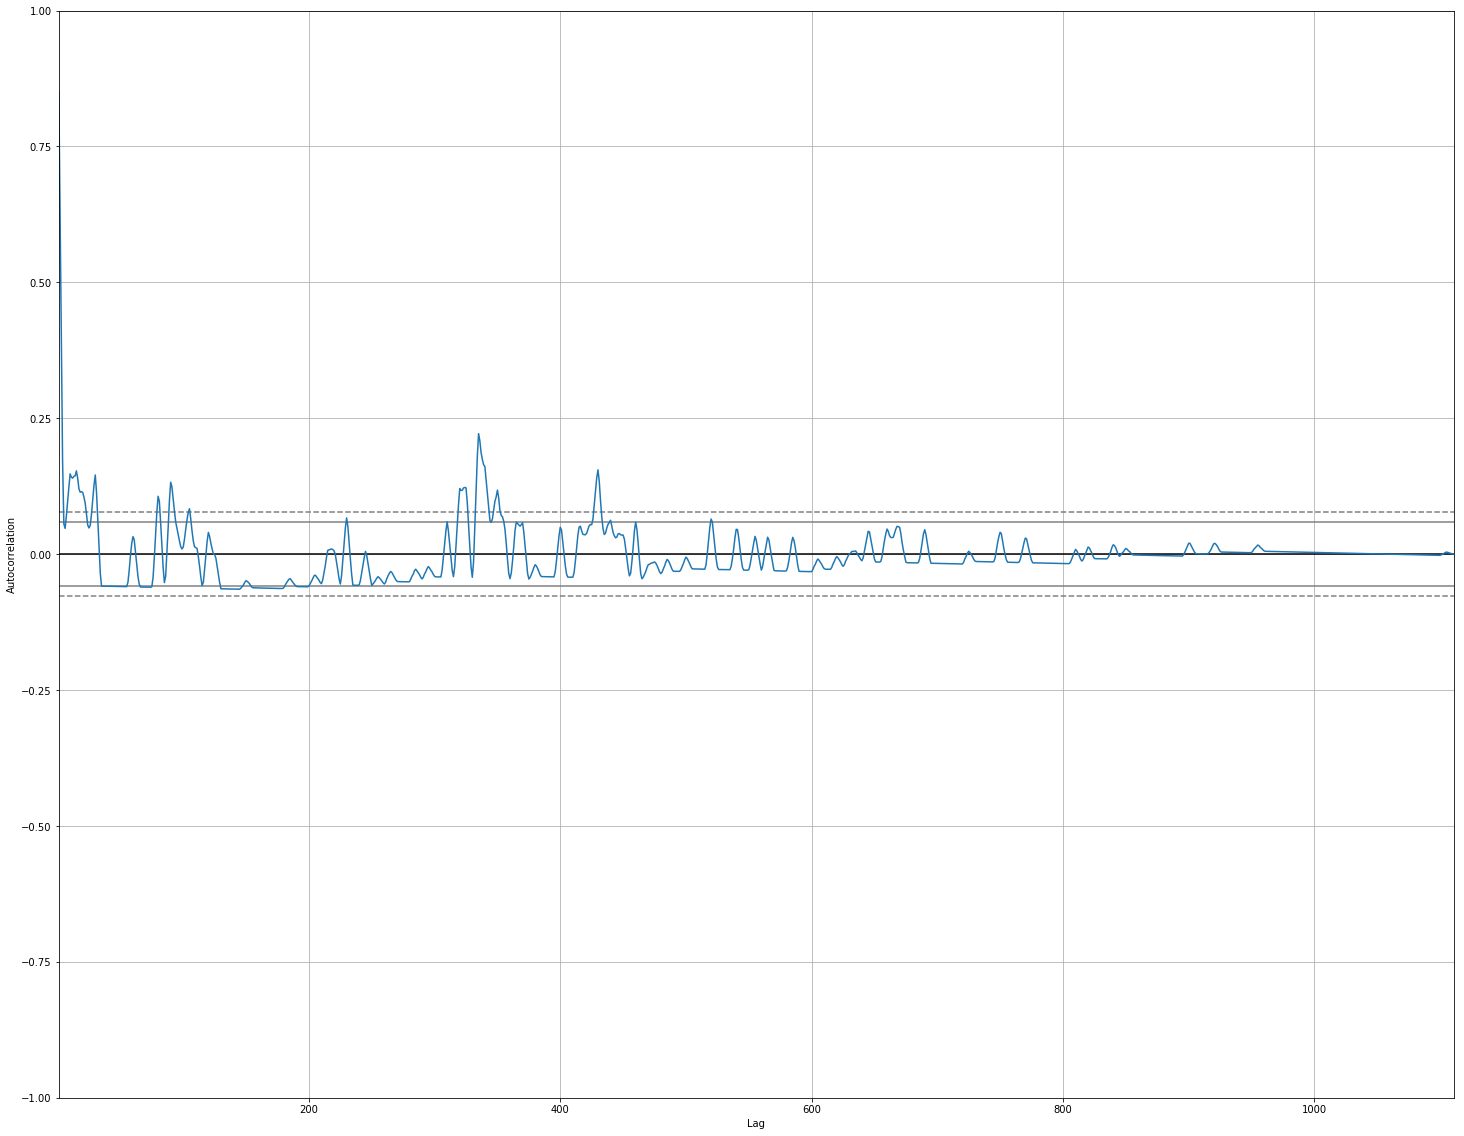

In [135]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(25, 20))
axis = autocorrelation_plot(ts_df)

** ARIMA Forecasting method is used to predict the load (requests / second) in the next minute **

In [118]:
from sklearn.metrics import mean_squared_error
X = ts_df.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	predictions.append(output[0])
	obs = test[t]
	history.append(obs)
	print('Predicted:{}, Actual:{}'.format(output[0], obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Predicted:[-0.09618729], Actual:0.0
Predicted:[-0.0959454], Actual:0.0
Predicted:[-0.09590557], Actual:0.0
Predicted:[-0.09579281], Actual:0.0
Predicted:[-0.09573249], Actual:0.0
Predicted:[-0.09561236], Actual:0.0
Predicted:[-0.09549502], Actual:0.0
Predicted:[-0.09543533], Actual:0.0
Predicted:[-0.09530432], Actual:0.0
Predicted:[-0.0951756], Actual:0.0
Predicted:[-0.09508092], Actual:0.0
Predicted:[-0.09495935], Actual:0.03333333333333333
Predicted:[-0.05495448], Actual:162.11666666666667
Predicted:[194.24183654], Actual:351.71666666666664
Predicted:[376.91230663], Actual:367.1333333333333
Predicted:[363.23821958], Actual:313.6666666666667
Predicted:[261.71625876], Actual:286.93333333333334
Predicted:[197.89124272], Actual:141.2
Predicted:[67.96655261], Actual:0.0
Predicted:[-3.09908747], Actual:0.0
Predicted:[23.44805927], Actual:0.0
Predicted:[41.7060962], Actual:0.0
Predicted:[73.8466462], Actual:0.0
Predicted:[26.64015886], Actual:0.0
Predicted:[-0.09043521], Actual:0.0
Predicte

Predicted:[80.42318551], Actual:84.35
Predicted:[53.13564284], Actual:41.083333333333336
Test MSE: 557.724


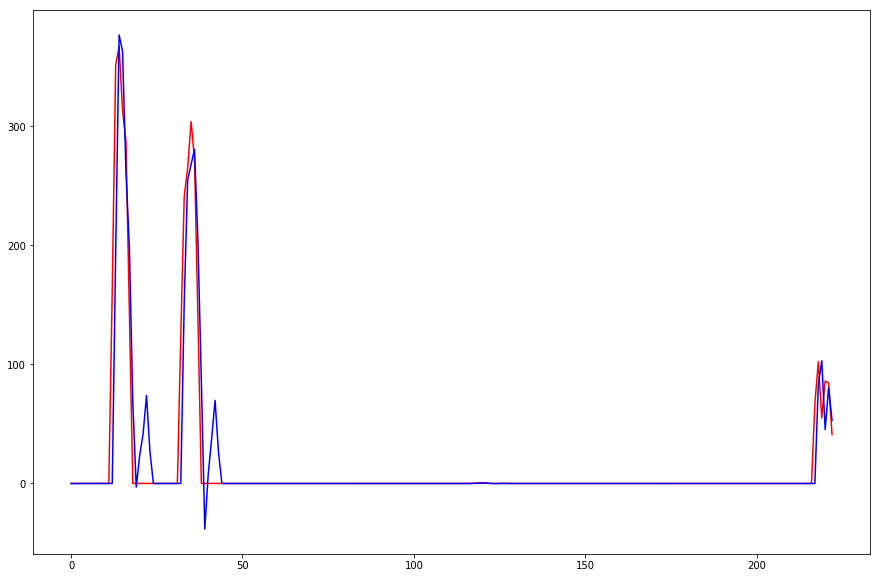

In [142]:
plt.figure(figsize=(15,10))
plt.plot(test,'red')
plt.plot(predictions,'blue')

** The above arima model captures most of the peaks **

***Predicting session time and unique URL hits for an IP***

#### Approach similar to recommender engines for predicting the session time of an IP
###1) If there is enough historical data for a given IP ADDRESS, session time will be average session time of all the hisorical sessions of the user with the same initial point url (Start URL) or the normal average session time of the user based on the starting point url
###2) If it is a new user or user with less historical data, session time will be average session time of all other users with similar starting url (bucket of URL)
###3) Parse the starting url to categorise into different buckets (ticket booking, otp request, money transfer etc) to predict the average session time according to average session times in that particular bucket 
###4) Transaction at the what time of the day matters 
###5) So, I think the ideal way to predict the session time for an user would be a multivariable polynomial regression with features (type of user (new or old), time of the day, bucket of url)
###6) This problem is a combination of regression and recommendation engine

##### The above similar approach would used to predict the unique url visits from an IP as well 